In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
import keras.datasets as d
help(d)

Help on package keras.datasets in keras:

NAME
    keras.datasets - Small NumPy datasets for debugging/testing.

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

FILE
    c:\programdata\anaconda3\lib\site-packages\keras\datasets\__init__.py




In [3]:
fmnist = keras.datasets.fashion_mnist
(X_train, y_train),(X_test, y_test) = fmnist.load_data()
#훈련데이터, 검증데이터 쪼개져있음

In [6]:
#X_train.shape
#y_train.shape
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

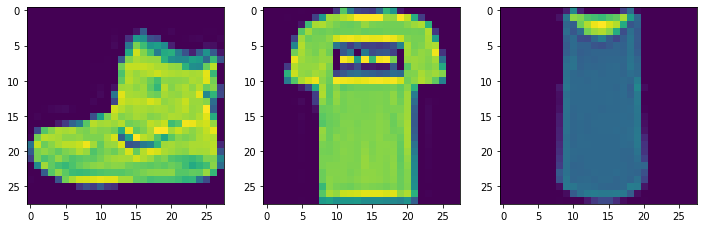

In [10]:
#이미지 그려보기 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.imshow(X_train[0])

plt.subplot(1,3,2)
plt.imshow(X_train[1])

plt.subplot(1,3,3)
plt.imshow(X_train[2])

In [16]:
X_train.shape
#X_test.shape

(60000, 28, 28)

In [17]:
#데이터 차원 증가 
import numpy as np
X_train2 = X_train[:,:,:,np.newaxis]
X_test2 = X_test[:,:,:,np.newaxis]
#주어진 데이터의 차원을 하나 증가(4차원으로 만듬) - 전 실습에서의 reshape과 같은 것

In [ ]:
#한 장의 이미지에 대해 3차원으로 만들어야하는 이유
#채널정보가 픽셀에 박혀있음

In [22]:
X_train2.shape
#y_train.shape

(60000, 28, 28, 1)

In [28]:
#원핫인코딩
y_train2 = to_categorical(y_train, 10)
y_test2 = to_categorical(y_test,10)
#10 : class 개수 

In [30]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3),
                strides=(1,1), padding='Same',
                activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
#filters : 2의n 승에 해당하는 값으로 노드의 개수 설정 (최솟값:2의5승=32)


model.add(Conv2D(filters = 64, kernel_size = (3,3),
                strides=(1,1), padding='Same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 32, kernel_size = (3,3),
                strides=(1,1), padding='Same',
                activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))




model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dense(units=10, activation='softmax'))


In [31]:
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)              

In [32]:
hist = model.fit(X_train2, y_train2,
         epochs =10,
         batch_size = 100,
         verbose =0)

In [33]:
#train에 대한 손실값, 정확도
hist.history['accuracy']

[0.8096833229064941,
 0.8794833421707153,
 0.8959166407585144,
 0.9072499871253967,
 0.9131166934967041,
 0.9178500175476074,
 0.9229999780654907,
 0.9260333180427551,
 0.9310833215713501,
 0.9352999925613403]

In [34]:
hist.history['loss']

[0.5894266963005066,
 0.33443787693977356,
 0.28573381900787354,
 0.253811240196228,
 0.2348259836435318,
 0.22243326902389526,
 0.20559513568878174,
 0.20114204287528992,
 0.1870763599872589,
 0.17378973960876465]

In [35]:
#모형성능평가
loss, acc = model.evaluate(X_test2, y_test2)
print('손실값:', round(loss,3))
print('정확도:', round(acc,3))

313/313 [==============================] - 18s 42ms/step - loss: 0.2822 - accuracy: 0.9048
손실값: 0.282
정확도: 0.905


In [36]:
y_pred = model.predict(X_test2)
print(y_pred[0:3])

[[2.42870133e-08 7.33897405e-12 2.48452908e-11 1.05327331e-06
  3.44347022e-08 1.19114884e-04 5.37148859e-09 6.69684901e-04
  8.97591406e-08 9.99209881e-01]
 [9.01108524e-06 6.14329088e-10 9.99550760e-01 1.02685658e-06
  1.42657271e-04 2.52711380e-10 2.96422950e-04 4.13529194e-12
  1.72322756e-09 6.70292771e-12]
 [2.43470843e-09 1.00000000e+00 1.99031361e-10 1.12460118e-10
  2.60493849e-11 2.99304148e-16 1.21748600e-09 5.48774567e-13
  1.79534630e-14 3.32881725e-16]]
